In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris.species.value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

In [5]:
iris_AR = iris.values

In [6]:
AR_X = iris_AR[:,0:4].astype(float)
AR_y = iris_AR[:,4]

In [7]:
AR_X.shape, AR_y.shape

((150, 4), (150,))

In [10]:
# 원핫인코딩
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
AR_yLBE = encoder.fit_transform(AR_y)
AR_yLBE

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
from tensorflow.keras.utils import to_categorical

AR_yLBE = to_categorical(AR_yLBE)
AR_yLBE

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [12]:
import tensorflow
tensorflow.__version__

'2.5.0'

In [13]:
tensorflow.keras.__version__

'2.5.0'

In [14]:
# 데이터 분할

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(AR_X, AR_yLBE,
                                                    test_size= 0.3,
                                                    random_state = 2045)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105, 3), (45, 3))

In [15]:
# keras modeling

from tensorflow.keras import models, layers

Model_iris = models.Sequential()

Model_iris.add(layers.Dense(16, activation = 'relu', input_shape=(4,)))
Model_iris.add(layers.Dense(8, activation = 'relu'))
Model_iris.add(layers.Dense(3, activation = 'softmax'))

In [16]:
Model_iris.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 27        
Total params: 243
Trainable params: 243
Non-trainable params: 0
_________________________________________________________________


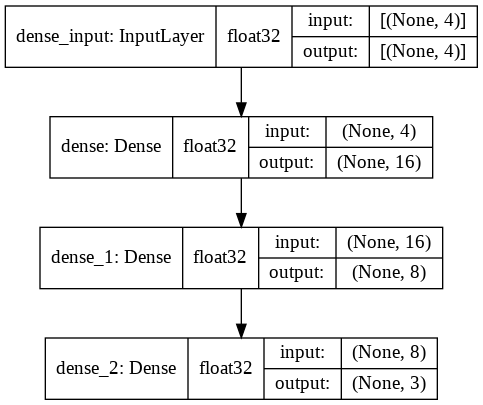

In [18]:
# 모델 레이어 시각화

from tensorflow.keras import utils

utils.plot_model(Model_iris,
                  show_shapes = True,
                  show_dtype = True)

In [19]:
# model compile

Model_iris.compile(loss = 'categorical_crossentropy',
                   optimizer = 'adam',
                   metrics = ['accuracy'])

In [20]:
# model fit
History_iris = Model_iris.fit(X_train, y_train,
                              epochs=500,
                              batch_size = 7,
                              validation_data = (X_test, y_test))

Epoch 1/500
15/15 [==============================] - 1s 13ms/step - loss: 1.3479 - accuracy: 0.3429 - val_loss: 1.2348 - val_accuracy: 0.3111
Epoch 2/500
15/15 [==============================] - 0s 2ms/step - loss: 1.1738 - accuracy: 0.3429 - val_loss: 1.1483 - val_accuracy: 0.2889
Epoch 3/500
15/15 [==============================] - 0s 3ms/step - loss: 1.1149 - accuracy: 0.3238 - val_loss: 1.0928 - val_accuracy: 0.2889
Epoch 4/500
15/15 [==============================] - 0s 2ms/step - loss: 1.0818 - accuracy: 0.3238 - val_loss: 1.0719 - val_accuracy: 0.2889
Epoch 5/500
15/15 [==============================] - 0s 4ms/step - loss: 1.0675 - accuracy: 0.3143 - val_loss: 1.0595 - val_accuracy: 0.2889
Epoch 6/500
15/15 [==============================] - 0s 2ms/step - loss: 1.0580 - accuracy: 0.3238 - val_loss: 1.0486 - val_accuracy: 0.2889
Epoch 7/500
15/15 [==============================] - 0s 3ms/step - loss: 1.0475 - accuracy: 0.3429 - val_loss: 1.0391 - val_accuracy: 0.3333
Epoch 8/500


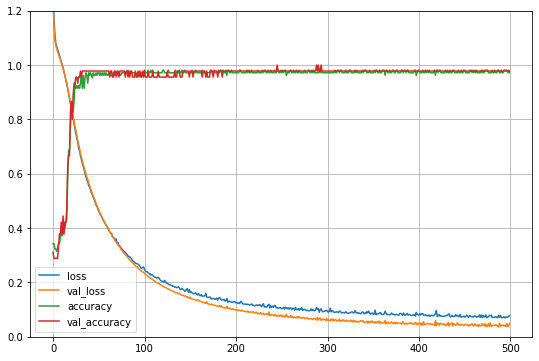

In [21]:
# 학습결과 시각화

import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
plt.ylim(0,1.2)
plt.plot(History_iris.history['loss'])
plt.plot(History_iris.history['val_loss'])
plt.plot(History_iris.history['accuracy'])
plt.plot(History_iris.history['val_accuracy'])
plt.legend(['loss', 'val_loss', 'accuracy', 'val_accuracy'])
plt.grid()
plt.show()


In [22]:
loss, accuracy = Model_iris.evaluate(X_test, y_test)

print('Loss = {:.2f}'.format(loss))
print('Accuracy = {:.2f}'.format(accuracy))

2/2 [==============================] - 0s 6ms/step - loss: 0.0499 - accuracy: 0.9778
Loss = 0.05
Accuracy = 0.98


In [23]:
# Model predict

import numpy as np
np.set_printoptions(suppress = True, precision = 5)
Model_iris.predict(X_test)

array([[0.98442, 0.01009, 0.00549],
       [0.97089, 0.02053, 0.00857],
       [0.00519, 0.97993, 0.01488],
       [0.     , 0.00033, 0.99967],
       [0.98442, 0.01009, 0.00549],
       [0.00047, 0.99327, 0.00626],
       [0.     , 0.01329, 0.98671],
       [0.98442, 0.01009, 0.00549],
       [0.     , 0.00111, 0.99889],
       [0.98442, 0.01009, 0.00549],
       [0.00015, 0.87171, 0.12814],
       [0.     , 0.00944, 0.99056],
       [0.00001, 0.99813, 0.00186],
       [0.98442, 0.01009, 0.00549],
       [0.98442, 0.01009, 0.00549],
       [0.00005, 0.9972 , 0.00275],
       [0.00002, 0.99008, 0.0099 ],
       [0.98442, 0.01009, 0.00549],
       [0.00001, 0.99833, 0.00166],
       [0.98442, 0.01009, 0.00549],
       [0.98442, 0.01009, 0.00549],
       [0.98442, 0.01009, 0.00549],
       [0.     , 0.00261, 0.99739],
       [0.98442, 0.01009, 0.00549],
       [0.     , 0.10484, 0.89516],
       [0.00001, 0.00855, 0.99144],
       [0.98442, 0.01009, 0.00549],
       [0.     , 0.99903, 0.

In [25]:
y_hat = Model_iris.predict_classes(X_test)
y_hat

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

In [27]:
# np.argmax(Model_iris.predict(X_test), axis = 1) <- 같은거

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

In [26]:
y = np.argmax(y_test, axis = 1)
y

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

In [28]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y, y_hat)

array([[17,  0,  0],
       [ 0, 14,  0],
       [ 0,  1, 13]])

In [29]:
print(classification_report(y, y_hat,
target_names = ['setosa',
'virginica',
'versicolor']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
   virginica       0.93      1.00      0.97        14
  versicolor       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [30]:
# 모델 저장 및 로드 방법

Model_iris.save('Model_iris.h5')  # 코랩에 저장


# 로컬에 저장

from google.colab import files  
files.download('Model_iris.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
from keras.models import load_model
Model_local = load_model('Model_iris.h5')  # 코렙에서 모델 열기
Model_local.predict_classes(X_test)

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

In [32]:
# 구글 드라이브에 저장

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets' # 확인

total 3850167
-rw------- 1 root root   31374019 Mar 31 15:04 Camel.zip
-rw------- 1 root root      20066 Mar 31 15:04 cat.1700.jpg
-rw------- 1 root root   69155672 Mar 31 15:04 creditCardFraud.zip
-rw------- 1 root root   82003032 Mar 31 15:05 DataSet.pkl
-rw------- 1 root root   90618980 Mar 31 15:05 dogs_and_cats_small.zip
-rw------- 1 root root   54561944 Mar 31 15:06 Face.zip
-rw------- 1 root root  862182613 Mar 31 15:10 GloVe.zip
-rw------- 1 root root  149574867 Jul 18 08:17 horse-or-human.zip
-rw------- 1 root root 1245927936 Mar 31 15:20 imagenetV2.zip
-rw------- 1 root root    8204887 Mar 31 15:06 Images_500.zip
-rw------- 1 root root   60711700 Mar 31 15:06 IMDB.zip
-rw------- 1 root root    4240457 Mar 31 15:07 Kaggle_Customer_Satisfaction.zip
-rw------- 1 root root   80596565 Mar 31 15:08 ko_w2v.zip
-rw------- 1 root root   12929865 Mar 31 15:08 Logo_Data.zip
-rw------- 1 root root   18272469 Mar 31 15:09 MNIST.csv
-rw------- 1 root root    7903524 Mar 31 15:09 naverRatin

In [34]:
import pandas as pd  # 드라이브에 있는 데이터 셋 열기
DF = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/PII.csv')
DF.head(3)

Name Gender  Age  Grade Picture BloodType  Height  Weight
0  송태섭     남자   21      3       무         B   179.1    63.9
1  최유정     여자   23      1       유         A   177.1    54.9
2  이한나     여자   20      1       무         A   167.9    50.2

In [35]:
Model_iris.save('/content/drive/My Drive/Colab Notebooks/models/001_Model_iris.h5')  # 드라이브에 모델 저장

In [36]:
!ls -l '/content/drive/My Drive/Colab Notebooks/models' # 확인

total 34
-rw------- 1 root root 34600 Aug  4 08:36 001_Model_iris.h5


In [37]:
from keras.models import load_model
Model_google = load_model('/content/drive/My Drive/Colab Notebooks/models/001_Model_iris.h5')

Model_google.predict_classes(X_test) # 모델 불러와서 예측

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])